In [ ]:
!pip install ydata-profiling

In [10]:
import pandas as pd
import ydata_profiling

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter('ignore')
import seaborn as sns

# Import machine learning models
from sklearn.neighbors import KNeighborsClassifier  # K-Nearest Neighbors classifier
from sklearn.svm import SVC  # Support Vector Classifier
from sklearn.tree import DecisionTreeClassifier  # Decision Tree classifier
from sklearn.linear_model import LogisticRegression  # Logistic Regression classifier

# Import machine learning evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

# Import tools for data splitting
from sklearn.model_selection import train_test_split

In [6]:
filename = "/content/predictive_maintenance_dataset.csv"
df = pd.read_csv(filename)

In [11]:
df.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [12]:
df.shape

(124494, 12)

In [13]:
df.drop_duplicates(inplace=True)
df.shape

(124493, 12)

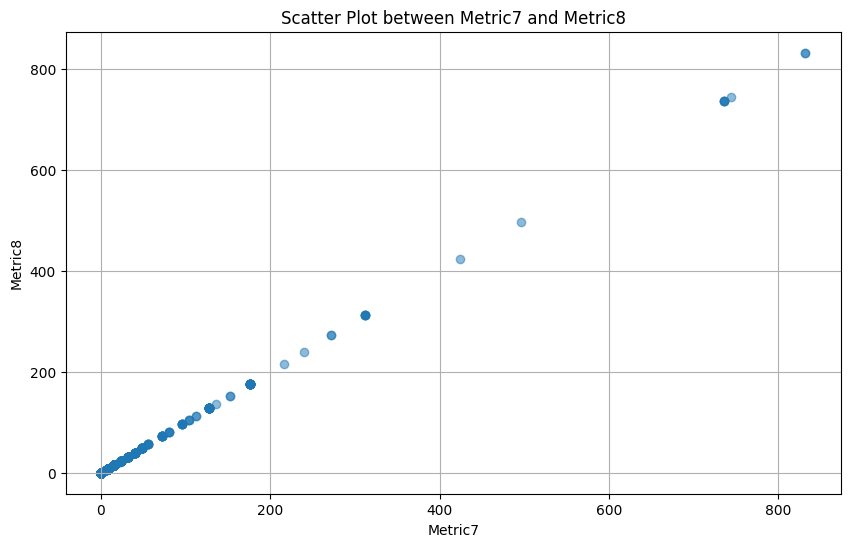

In [14]:
# Scatter plot using matplotlib
# As by judging the csv file metric 7 and 8 seem a lot alike
plt.figure(figsize=(10, 6))
plt.scatter(df['metric7'], df['metric8'], alpha=0.5)
plt.title('Scatter Plot between Metric7 and Metric8')
plt.xlabel('Metric7')
plt.ylabel('Metric8')
plt.grid(True)
plt.show()

In [15]:
# to apply a logarithmic transformation to specific columns in a Pandas DataFrame.
# such that we remove the metrics having same inputs.
for num in ["2","3","4","7","8","9"]:
    df[f'metric{num}'] = np.log1p(df[f'metric{num}'])

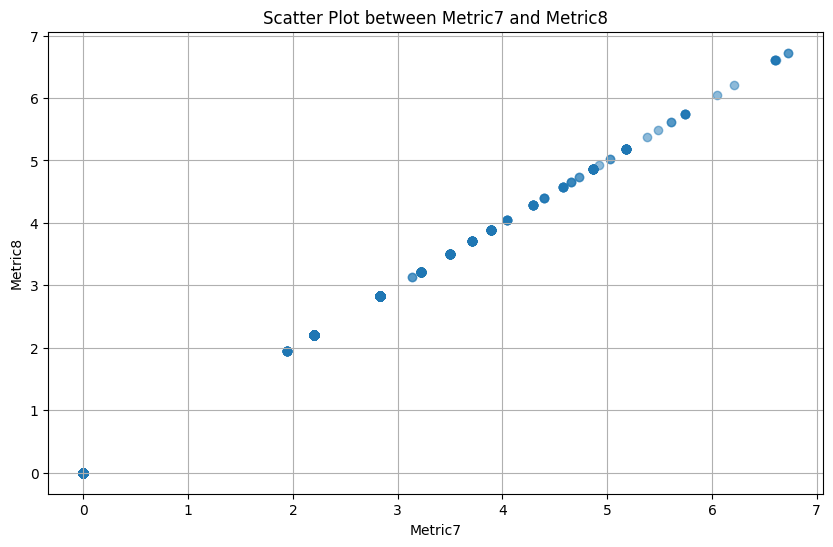

In [16]:
# plotting again for clarity
# Scatter plot using matplotlib
plt.figure(figsize=(10, 6))
plt.scatter(df['metric7'], df['metric8'], alpha=0.5)
plt.title('Scatter Plot between Metric7 and Metric8')
plt.xlabel('Metric7')
plt.ylabel('Metric8')
plt.grid(True)
plt.show()



Dropping metric 8 as the lograthmic transformation suggest that both metric 7 and 8 are same and thus dropping it for less complexity.

In [17]:
df.drop("metric8",axis=1,inplace=True)

In [18]:
df["device"]

0         S1F01085
1         S1F0166B
2         S1F01E6Y
3         S1F01JE0
4         S1F01R2B
            ...   
124489    Z1F0MA1S
124490    Z1F0Q8RT
124491    Z1F0QK05
124492    Z1F0QL3N
124493    Z1F0QLC1
Name: device, Length: 124493, dtype: object

In [19]:
df["device_model"]=df["device"].apply(lambda x : x[:4])
df["device_model"].value_counts()

device_model
S1F0    33168
W1F0    23294
S1F1    21689
W1F1    19974
Z1F0    18869
Z1F1     7248
Z1F2      251
Name: count, dtype: int64

Separates the device names and counts them.

In [20]:
df["device_rest"]=df["device"].apply(lambda x : x[4:])
df["device_rest"].value_counts()[:20]

device_rest
QLC1    304
KYCR    304
E9EP    304
EGMT    304
FGBQ    304
FP0C    304
GCED    304
GGPP    304
5X69    304
GPXY    304
H6JG    304
FEH7    304
MA1S    304
FY92    304
FZPA    304
G9T7    304
JH87    304
JXDL    304
JY02    304
GB8A    304
Name: count, dtype: int64

Separates the rest of the name and counts them

In [21]:
df.drop("device",axis=1,inplace=True)

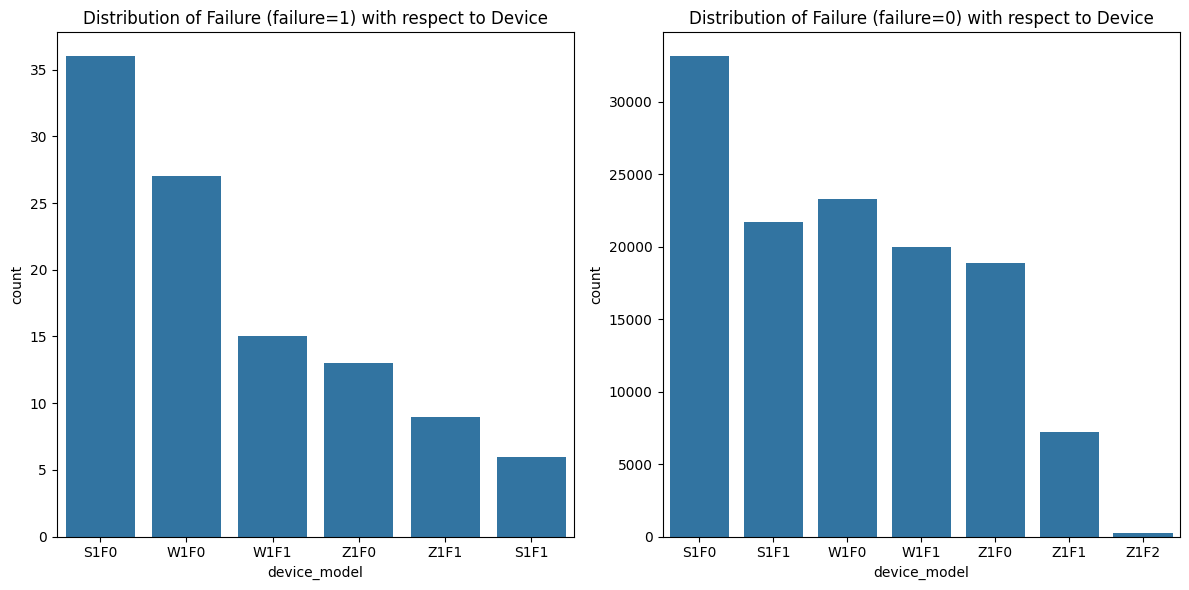

In [22]:
# Create a figure with 1 row and 2 columns
plt.figure(figsize=(12, 6))
# Plot the distribution of 'failure' with respect to 'device' for failure=1
plt.subplot(1, 2, 1)
sns.countplot(x="device_model", data=df.loc[df["failure"] == 1])
plt.title('Distribution of Failure (failure=1) with respect to Device')

# Plot the distribution of 'failure' with respect to 'device' for failure=0
plt.subplot(1, 2, 2)
sns.countplot(x="device_model", data=df.loc[df["failure"] == 0])
plt.title('Distribution of Failure (failure=0) with respect to Device')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

In [23]:
df.drop(df.loc[df["device_model"]=="Z1F2"].index,axis=0,inplace=True)
df.reset_index(drop=True,inplace=True)
df.tail()

date  failure    metric1   metric2   metric3   metric4  metric5  \
124237  11/2/2015        0   18310224  0.000000  0.000000  0.000000       10   
124238  11/2/2015        0  172556680  4.574711  4.682131  1.609438       11   
124239  11/2/2015        0   19029120  8.483223  0.000000  0.000000       11   
124240  11/2/2015        0  226953408  0.000000  0.000000  0.000000       12   
124241  11/2/2015        0   17572840  0.000000  0.000000  0.000000       10   

        metric6   metric7    metric9 device_model device_rest  
124237   353705  2.197225   0.000000         Z1F0        MA1S  
124238   332792  0.000000   2.639057         Z1F0        Q8RT  
124239   350410  0.000000   0.000000         Z1F0        QK05  
124240   358980  0.000000   0.000000         Z1F0        QL3N  
124241   351431  0.000000  11.156265         Z1F0        QLC1

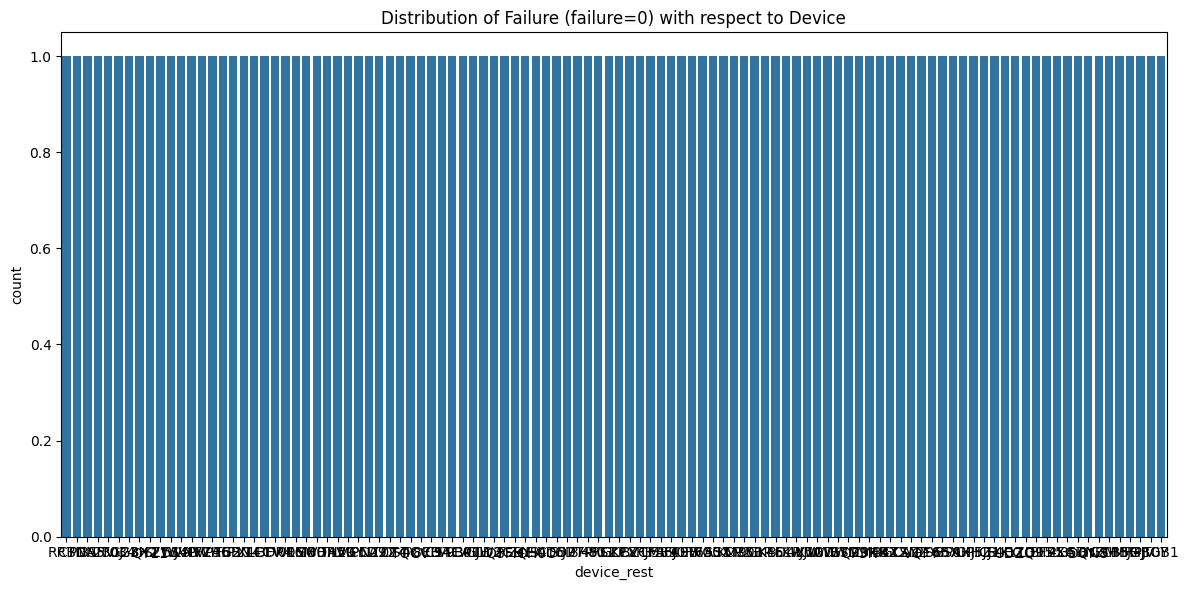

In [24]:
# Create a figure with 1 row and 2 columns
plt.figure(figsize=(12, 6))
sns.countplot(x="device_rest", data=df.loc[df["failure"] == 1])
plt.title('Distribution of Failure (failure=0) with respect to Device')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

This shows that since this device_rest column is of target 1 so we can just drop it as it is useless to keep, thus more efficient.


In [25]:
df.drop("device_rest",axis=1,inplace=True)
df.sample(10)

date  failure    metric1  metric2  metric3   metric4  metric5  \
12722   1/14/2015        0   87819288      0.0      0.0  0.000000       11   
118249  9/10/2015        0    4512120      0.0      0.0  0.000000       11   
10335   1/11/2015        0   93096328      0.0      0.0  0.000000       12   
42750   2/26/2015        0  122337752      0.0      0.0  0.000000        7   
121974  10/5/2015        0   75562720      0.0      0.0  0.000000       10   
71596   4/18/2015        0   56569760      0.0      0.0  0.000000       11   
106729  7/26/2015        0  134873480      0.0      0.0  0.000000        7   
12754   1/14/2015        0  179751736      0.0      0.0  0.000000        7   
3462     1/3/2015        0   79444248      0.0      0.0  1.609438        6   
111376   8/9/2015        0   46735696      0.0      0.0  0.000000        7   

        metric6  metric7   metric9 device_model  
12722    216031      0.0  1.609438         W1F1  
118249   514966      0.0  0.000000         Z1F0  
10335    294565      0.0  0.000000         W1F0  
42750    245612      0.0  0.000000         W1F0  
121974   531477      0.0  0.000000         Z1F0  
71596    216716      0.0  0.000000         S1F1  
106729   329949      0.0  0.000000         Z1F0  
12754    286901      0.0  0.000000         Z1F0  
3462         19      0.0  0.000000         Z1F1  
111376   332421      0.0  0.000000         Z1F0

Distribution for failure is 0


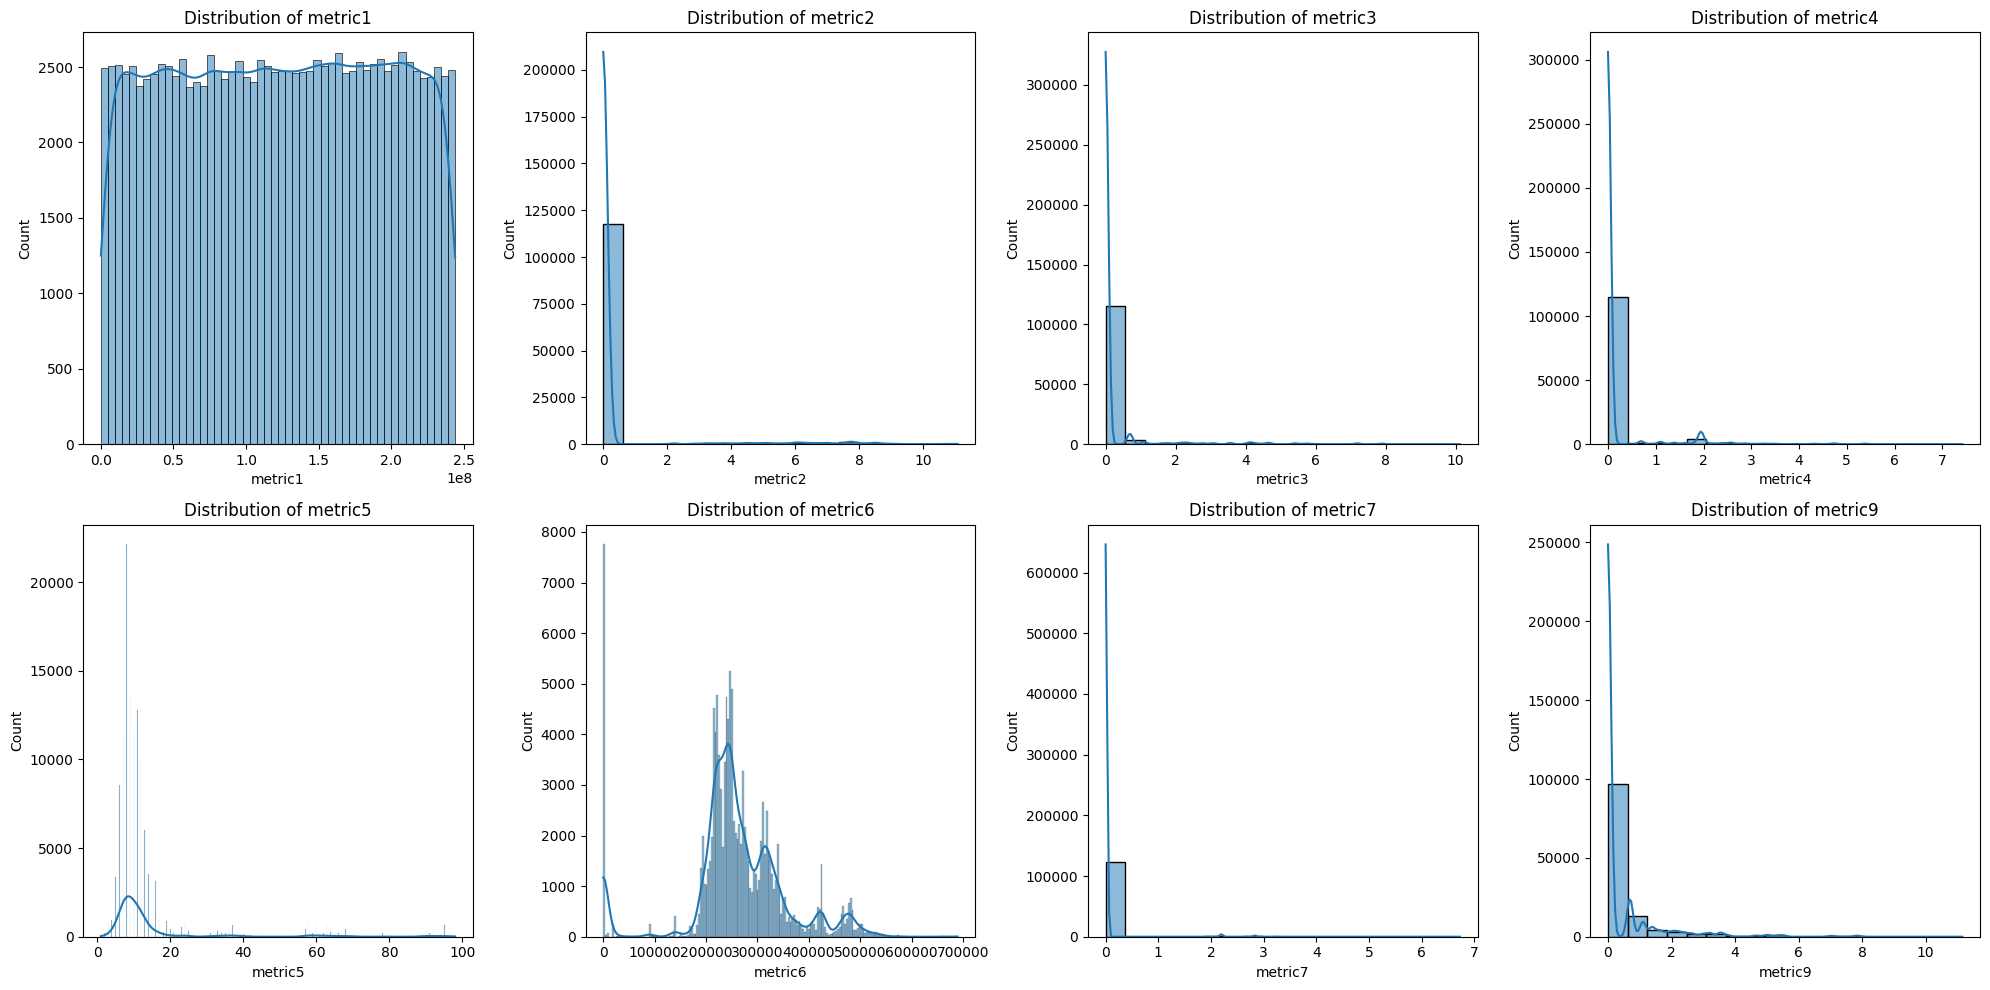

In [26]:
plt.figure(figsize=(4*5, 2*5))
print("Distribution for failure is 0")
mask= df.failure==0
for i, col in enumerate(['metric1', 'metric2', 'metric3', 'metric4', 'metric5', 'metric6', 'metric7',  'metric9']):
    plt.subplot(2, 4, i + 1)
    sns.histplot(data=df.loc[mask], x=col, kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()

Distribution for failure is 1


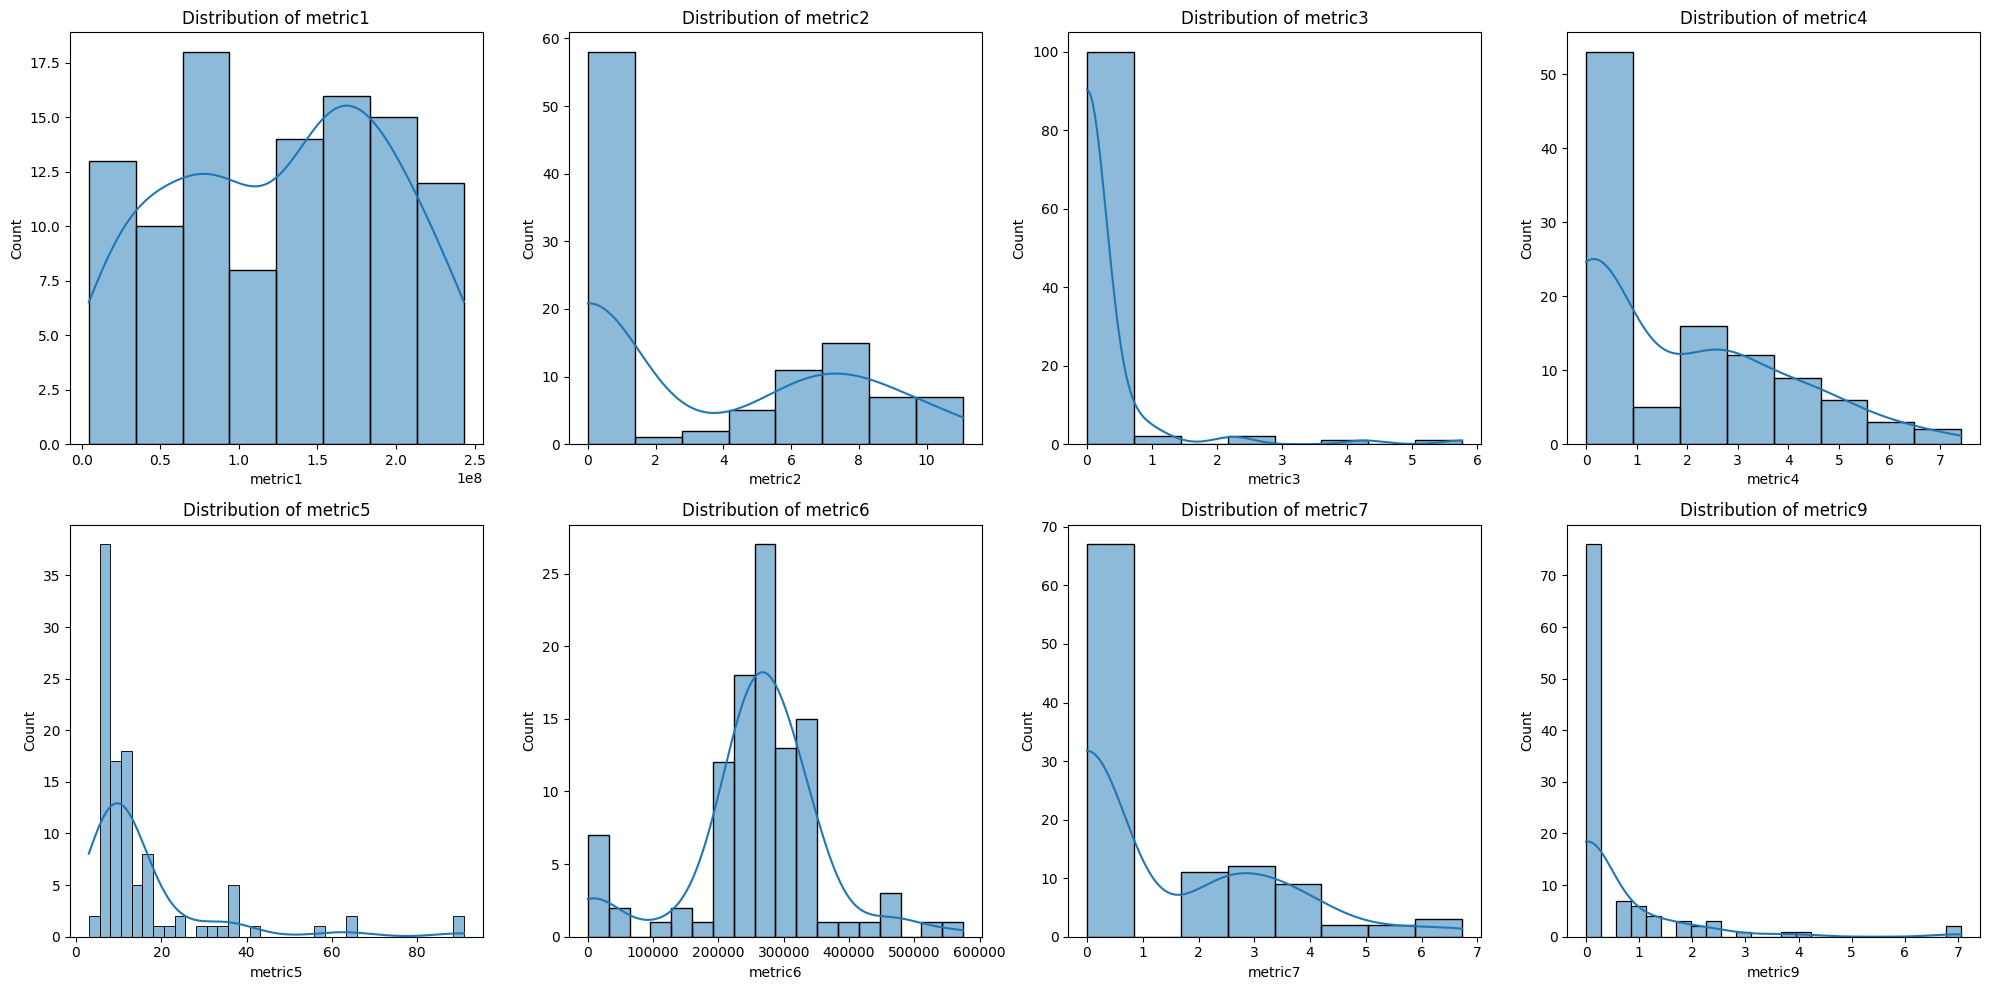

In [27]:
plt.figure(figsize=(20, 10))
print("Distribution for failure is 1")
mask= df.failure>0
for i, col in enumerate(['metric1', 'metric2', 'metric3', 'metric4', 'metric5', 'metric6', 'metric7', 'metric9']):
    plt.subplot(2, 4, i + 1)
    sns.histplot(data=df.loc[mask], x=col, kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()

Text(0.5, 1.0, 'Failure over Time by Week')

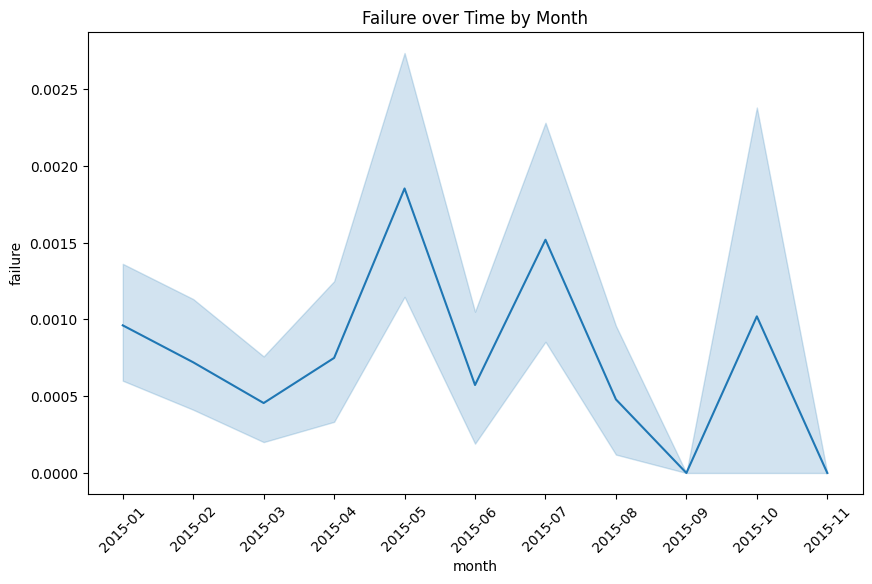

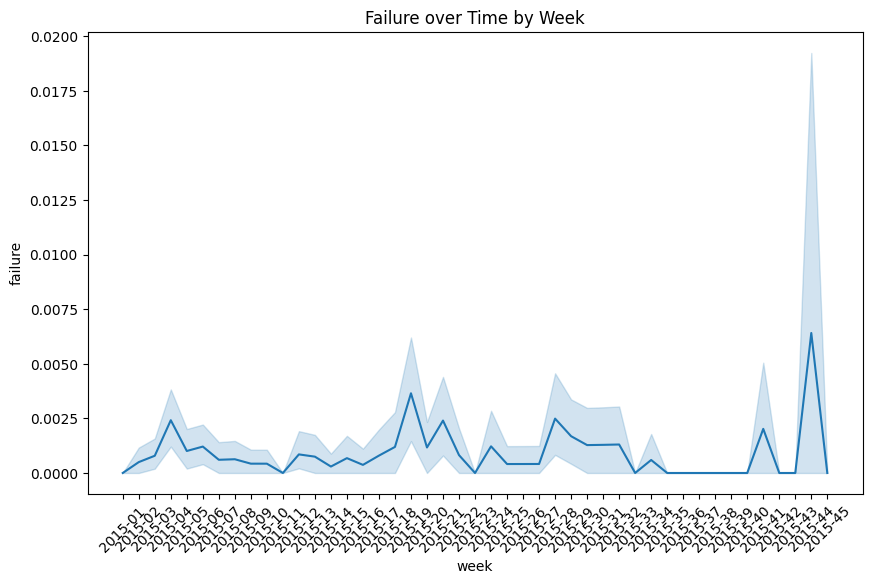

In [29]:
# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Extract and format the 'month' column for plotting
df['month'] = df['date'].dt.to_period('M')
df['month'] = df['month'].dt.strftime('%Y-%m')

# Create a line plot to visualize 'failure' over time by month
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='month', y='failure')
plt.xticks(rotation=45)
plt.title("Failure over Time by Month")

# Extract and format the 'week' column for plotting
df['week'] = df['date'].dt.to_period('W')
df['week'] = df['week'].dt.strftime('%Y-%U')

# Create a line plot to visualize 'failure' over time by week
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='week', y='failure')
plt.xticks(rotation=45)
plt.title("Failure over Time by Week")

Text(0.5, 1.0, 'Correlation Matrix')

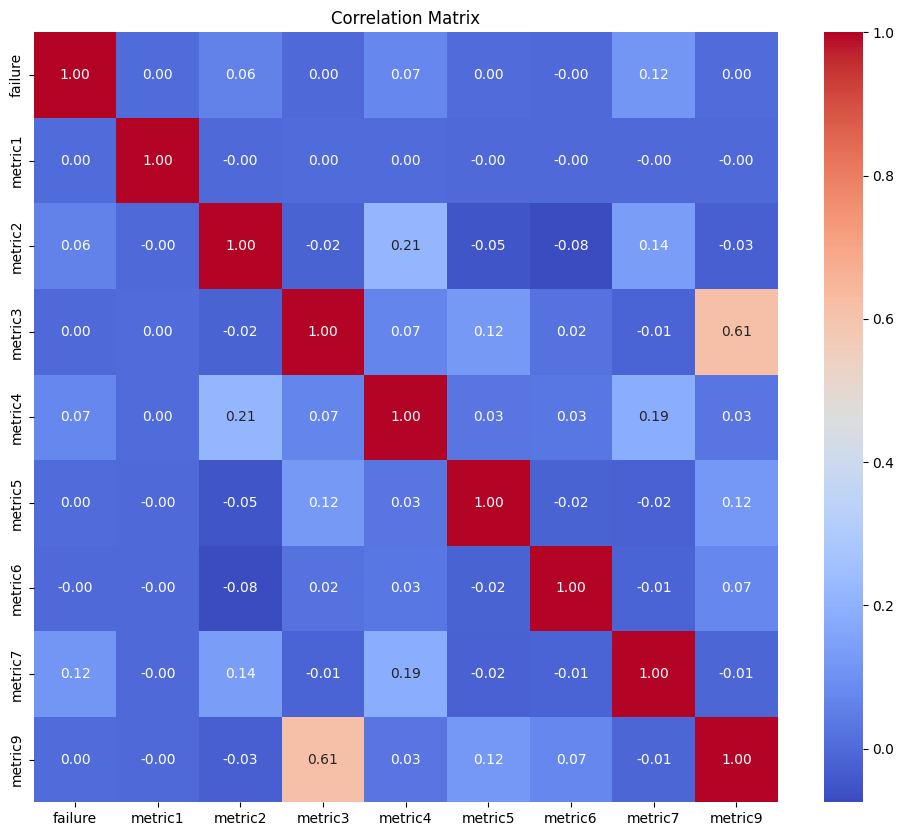

In [30]:
# Select only numeric columns for the correlation matrix
numeric_cols = df.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix = numeric_cols.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")

Text(0.5, 1.0, "Distribution of 'failure'")

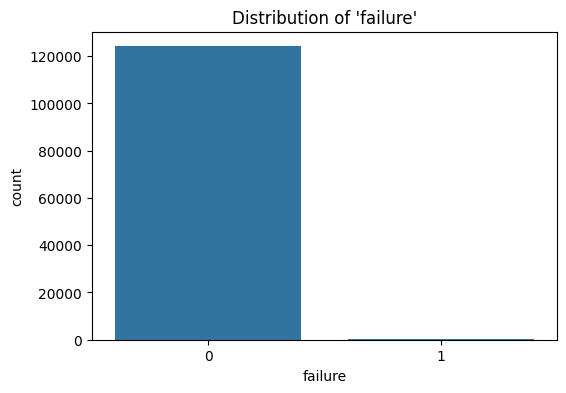

In [31]:
# Create a countplot to visualize the distribution of 'failure'
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='failure')
plt.title("Distribution of 'failure'")

We can see that undersampling is happening

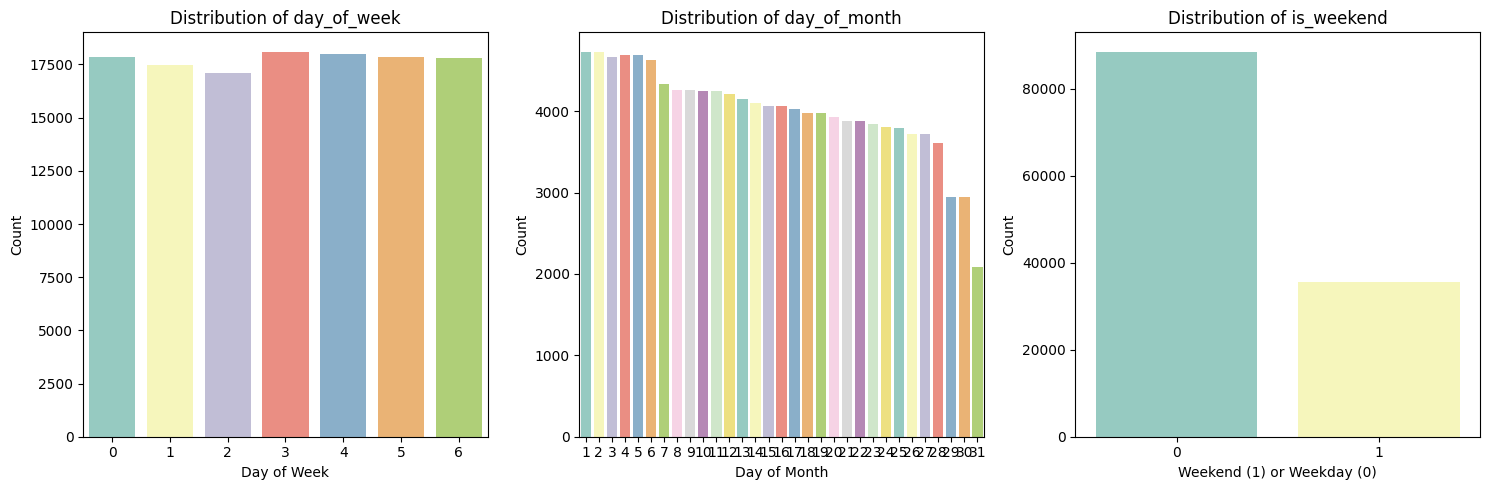

In [32]:
# Extract day of week, day of month, and is_weekend features from the 'date' column
df['date'] = pd.to_datetime(df['date'])
df['day_of_week'] = df['date'].dt.dayofweek
df['day_of_month'] = df['date'].dt.day
df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

# Create subplots to visualize the distribution of day_of_week, day_of_month, and is_weekend
plt.figure(figsize=(15, 5))

# Distribution of 'day_of_week'
plt.subplot(131)
sns.countplot(data=df, x='day_of_week', palette='Set3')
plt.title("Distribution of day_of_week")
plt.xlabel("Day of Week")
plt.ylabel("Count")

# Distribution of 'day_of_month'
plt.subplot(132)
sns.countplot(data=df, x='day_of_month', palette='Set3')
plt.title("Distribution of day_of_month")
plt.xlabel("Day of Month")
plt.ylabel("Count")

# Distribution of 'is_weekend'
plt.subplot(133)
sns.countplot(data=df, x='is_weekend', palette='Set3')
plt.title("Distribution of is_weekend")
plt.xlabel("Weekend (1) or Weekday (0)")
plt.ylabel("Count")

# Show the subplots
plt.tight_layout()
plt.show()



In [33]:
# Extract the month number and week number from the 'date' column and drop the 'date' column
df['month'] = df['date'].dt.month
df['week'] = df['date'].dt.isocalendar().week
df = df.drop(['date'], axis=1)

# Check the DataFrame information after these transformations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124242 entries, 0 to 124241
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   failure       124242 non-null  int64  
 1   metric1       124242 non-null  int64  
 2   metric2       124242 non-null  float64
 3   metric3       124242 non-null  float64
 4   metric4       124242 non-null  float64
 5   metric5       124242 non-null  int64  
 6   metric6       124242 non-null  int64  
 7   metric7       124242 non-null  float64
 8   metric9       124242 non-null  float64
 9   device_model  124242 non-null  object 
 10  month         124242 non-null  int32  
 11  week          124242 non-null  UInt32 
 12  day_of_week   124242 non-null  int32  
 13  day_of_month  124242 non-null  int32  
 14  is_weekend    124242 non-null  int64  
dtypes: UInt32(1), float64(5), int32(3), int64(5), object(1)
memory usage: 12.4+ MB


In [34]:
df=pd.get_dummies(df,drop_first=True)

In [35]:
pip install imblearn

In [36]:
from imblearn.under_sampling import RandomUnderSampler

In [37]:
# Create a copy of the DataFrame 'df'
X = df.copy()

# Create the target variable 'Y' by selecting the 'failure' column
Y = df["failure"]

# Remove the 'failure' column from the feature matrix 'X'
X.drop("failure", axis=1, inplace=True)

In [38]:
# Create an instance of the RandomUnderSampler with a fixed random state
rus = RandomUnderSampler(random_state=42)

# Perform random under-sampling and obtain resampled feature matrix and target variable
X_resampled, y_resampled = rus.fit_resample(X, Y)

In [39]:
under_sample = X_resampled.copy()
under_sample["failure"] = y_resampled

Adding the failure column back

In [40]:
under_sample.sample(10)

metric1   metric2   metric3   metric4  metric5  metric6   metric7  \
97    51722496  0.000000  0.000000  0.000000       10   246237  0.000000   
57   172223120  0.000000  5.765191  0.000000        6   310561  0.000000   
196  230884776  9.133999  0.000000  2.564949        6   269760  0.000000   
136  234573048  0.000000  0.000000  2.079442       34   288871  2.197225   
195  200596156  4.488636  0.000000  3.496508        9   238717  4.043051   
11    63332432  0.000000  0.000000  0.000000       16   337006  0.000000   
131  201059304  6.867974  0.000000  4.779123       36   277338  5.379897   
77   239817592  0.000000  0.000000  0.000000        9   501438  0.000000   
107  184069720  6.270988  0.000000  1.609438        9   387871  3.496508   
200   34078352  5.843544  0.000000  2.564949        8   139881  0.000000   

      metric9  month  week  day_of_week  day_of_month  is_weekend  \
97   1.945910      7    30            3            23           0   
57   2.944439      4    18            2            29           0   
196  0.000000      7    29            1            14           0   
136  0.000000      2     7            0             9           0   
195  0.000000      7    29            0            13           0   
11   0.000000      4    18            2            29           0   
131  1.098612      2     6            0             2           0   
77   0.000000      8    32            5             8           1   
107  1.386294      1     2            2             7           0   
200  0.000000      7    30            0            20           0   

     device_model_S1F1  device_model_W1F0  device_model_W1F1  \
97                True              False              False   
57               False              False              False   
196              False              False              False   
136              False               True              False   
195              False              False               True   
11                True              False              False   
131              False               True              False   
77               False              False              False   
107              False              False              False   
200              False              False               True   

     device_model_Z1F0  device_model_Z1F1  failure  
97               False              False        0  
57                True              False        0  
196              False              False        1  
136              False              False        1  
195              False              False        1  
11               False              False        0  
131              False              False        1  
77                True              False        0  
107              False              False        1  
200              False              False        1

Now to check if undersampling is still there or not

Text(0.5, 1.0, "Distribution of 'failure'")

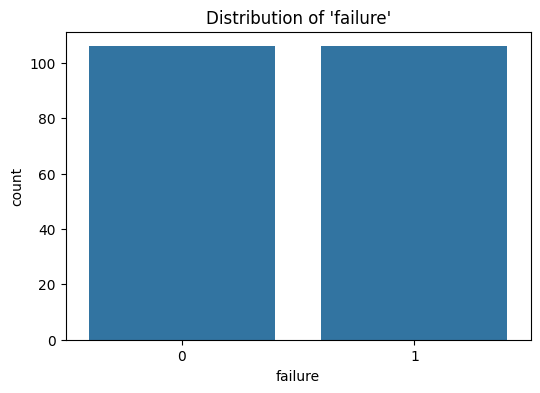

In [41]:
plt.figure(figsize=(6, 4))
sns.countplot(data=under_sample, x='failure')
plt.title("Distribution of 'failure'")

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Create feature matrix 'X_norm' and target variable 'y_norm'
X_norm = under_sample.drop(['failure'], axis=1)
y_norm = under_sample['failure']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X_norm, y_norm, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define a function to evaluate multiple classifiers and return a DataFrame with metrics
def evaluate_model(x_train, y_train, x_test, y_test):
    # Define a list of classifiers
    classifiers = [
        RandomForestClassifier(),
        AdaBoostClassifier(),
        KNeighborsClassifier(),
        SVC()
    ]

    # Define the names of classifiers
    classifier_names = [
        'RandomForest',
        'AdaBoost',
        'KNeighbors',
        'SVC',
    ]

    # Create an empty DataFrame for metrics
    metrics = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1'], index=classifier_names)

    # Evaluate each classifier and store the metrics
    for i, clf in enumerate(classifiers):
        clf.fit(x_train, y_train)
        y_pred = clf.predict(x_test)

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        metrics.loc[classifier_names[i], 'Accuracy'] = accuracy
        metrics.loc[classifier_names[i], 'Precision'] = precision
        metrics.loc[classifier_names[i], 'Recall'] = recall
        metrics.loc[classifier_names[i], 'F1'] = f1

    # Sort the metrics by accuracy in descending order
    metrics = metrics.sort_values(by='Accuracy', ascending=False)

    return metrics

# Step 4: Evaluate models
metrics = evaluate_model(x_train, y_train, x_test, y_test)

In [44]:
metrics

Accuracy Precision    Recall        F1
AdaBoost      0.906977  0.916667  0.916667  0.916667
SVC           0.883721       1.0  0.791667  0.883721
RandomForest  0.837209  0.904762  0.791667  0.844444
KNeighbors    0.767442    0.9375     0.625      0.75

In [48]:
pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 7.6 MB/s eta 0:00:00


In [49]:
import optuna

In [45]:
#RANDOM FOREST
def objective_rf(trial):
    # Define the hyperparameters to optimize
    n_estimators = trial.suggest_int('n_estimators', 10, 150)
    max_depth = trial.suggest_int('max_depth', 2, 32)
    min_samples_split = trial.suggest_uniform('min_samples_split', 0.1, 1.0)
    min_samples_leaf = trial.suggest_uniform('min_samples_leaf', 0.1, 0.5)
    max_features = trial.suggest_categorical('max_features', ['log2', 'sqrt'])  # Only suggest valid options

    # Create and train the RandomForestClassifier with the suggested hyperparameters
    clf = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42
    )

    # Train the classifier on the training data
    clf.fit(x_train, y_train)

    # Make predictions on the test data
    y_pred = clf.predict(x_test)

    # Calculate F1 score as the objective to maximize
    f1 = f1_score(y_test, y_pred)

    return f1

In [50]:
def create_study(objective):
    # Create an Optuna study

    # Set logging level to WARNING to suppress unnecessary output
    optuna.logging.set_verbosity(optuna.logging.WARNING)
    study = optuna.create_study(direction='maximize')  # We want to maximize accuracy

    # Run the optimization
    study.optimize(objective, n_trials=100)  # You can adjust the number of trials

    # Get the best hyperparameters from the study
    best_params = study.best_params
    best_f1 = study.best_value
    print(f'Best hyperparameters: {best_params}')
    print(f'Best f1 score: {best_f1}')
    return best_params

In [51]:
best_params=create_study(objective_rf)
best_rf = RandomForestClassifier(**best_params, random_state=42)
y_pred_rf=best_rf.fit(x_train, y_train).predict(x_test)

Best hyperparameters: {'n_estimators': 27, 'max_depth': 10, 'min_samples_split': 0.37805908685470496, 'min_samples_leaf': 0.13791388751773767, 'max_features': 'log2'}
Best f1 score: 0.8695652173913043


In [52]:
#ADABOOST
# Define the objective function for Optuna
def objective_ab(trial):
    # Define the hyperparameters to optimize
    n_estimators = trial.suggest_int("n_estimators", 50, 200)  # Number of weak learners
    learning_rate = trial.suggest_float("learning_rate", 0.01, 1.0)  # Learning rate
    algorithm = trial.suggest_categorical("algorithm", ["SAMME", "SAMME.R"])  # AdaBoost algorithm

    # Create an AdaBoostClassifier with the suggested hyperparameters
    model = AdaBoostClassifier(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        algorithm=algorithm,
        random_state=42
    )

    # Train the model
    model.fit(x_train, y_train)

    # Make predictions on the validation set
    y_pred = model.predict(x_test)

    # Calculate F1 score as the objective to maximize
    f1 = f1_score(y_test, y_pred)

    return f1



In [53]:
best_params=create_study(objective_ab)
best_ab = AdaBoostClassifier(**best_params, random_state=42)
y_pred_ab=best_ab.fit(x_train, y_train).predict(x_test)

Best hyperparameters: {'n_estimators': 161, 'learning_rate': 0.8976507228727608, 'algorithm': 'SAMME.R'}
Best f1 score: 0.9361702127659574


In [54]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import optuna

def objective_knn(trial):
    # Define hyperparameters to optimize
    params = {
        'n_neighbors': trial.suggest_int('n_neighbors', 3, 20),
        'weights': trial.suggest_categorical('weights', ['uniform', 'distance']),
        'p': trial.suggest_int('p', 1, 2),  # p=1 for Manhattan distance, p=2 for Euclidean distance
    }

    # Initialize the classifier with hyperparameters
    clf = KNeighborsClassifier(**params)

    # Train the classifier on the training data
    clf.fit(x_train, y_train)

    # Make predictions on the test data
    y_pred = clf.predict(x_test)

    # Calculate F1 score as the objective to maximize
    f1 = f1_score(y_test, y_pred)

    return f1

In [55]:
best_params=create_study(objective_knn)
best_knn = KNeighborsClassifier(**best_params)
y_pred_knn=best_knn.fit(x_train, y_train).predict(x_test)

Best hyperparameters: {'n_neighbors': 12, 'weights': 'distance', 'p': 2}
Best f1 score: 0.8


In [56]:
def objective_svc(trial):
    # Define hyperparameters to optimize
    params = {
        'C': trial.suggest_loguniform('C', 1e-3, 1e3),
        'kernel': trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf', 'sigmoid']),
        'degree': trial.suggest_int('degree', 2, 5) if trial.params['kernel'] == 'poly' else 1,
        'gamma': trial.suggest_categorical('gamma', ['scale', 'auto']) if trial.params['kernel'] in ['rbf', 'poly', 'sigmoid'] else 'scale',
    }

    # Initialize the classifier with hyperparameters
    clf = SVC(**params, random_state=42)

    # Train the classifier on the training data
    clf.fit(x_train, y_train)

    # Make predictions on the test data
    y_pred = clf.predict(x_test)

    # Calculate F1 score as the objective to maximize
    f1 = f1_score(y_test, y_pred)

    return f1

In [57]:
best_params=create_study(objective_svc)
best_svc = SVC(**best_params)
y_pred_svc=best_svc.fit(x_train, y_train).predict(x_test)

Best hyperparameters: {'C': 1.0851418937649333, 'kernel': 'rbf', 'gamma': 'scale'}
Best f1 score: 0.8837209302325582


Hence, it can be seen that the max f1 score that we received is for ADABOOST.